In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
print(nltk.data.path)
nltk.download('words')
nltk.download('vader_lexicon')


plt.style.use("ggplot")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


['C:\\Users\\User/nltk_data', 'c:\\Users\\User\\anaconda3\\nltk_data', 'c:\\Users\\User\\anaconda3\\share\\nltk_data', 'c:\\Users\\User\\anaconda3\\lib\\nltk_data', 'C:\\Users\\User\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_csv('./amazon_dataset (1).csv')

In [4]:
df.head()

product_title  \
0  SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
1  SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
2  SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
3  SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
4  SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   

                     user_name  rating  \
0  Galaxy A54 Product Overview     5.0   
1                          NaN     5.0   
2                          NaN     4.0   
3                          NaN     5.0   
4                          NaN     5.0   

                                              review  
0  Am not a power user or someone who lives on th...  
1  Very Durable! Very easy to set up and use. It ...  
2  This turned out to be the perfect phone model ...  
3  I've only had it for a few days now and it's h...  
4  Not the best nor the worst. It adequately meet...

In [5]:
df['review'].values[0]

'Am not a power user or someone who lives on their phone. So can\'t rate the hi tech features. Phone is mostly for occasional or emergency use, and don\'t much care about camera capabilities. My last phone was a budget phone, so this was a quantum leap upgrade. This one seems to first and foremost to have MUCH better reach to the tower, granted the 5G capability likely has something to do with that. First cell phone ever which works at my house, and I\'m using the cheapest service provider there is here in the States, which I can\'t name here. Battery charges up fast, standby time is a lot better than my old phone ever was when new.Touch screen when scrolling and virtual keyboard and reorientation is snappy. Really like the adaptive brightness. Know most all phones now have wi-fi enabled calling, even my old phone once did but when changed service providers they no longer supported on the antiquated handset. Wi-fi enabled calling works GREAT on this phone. When my antiquated DSL isp wa

In [6]:
print(df.shape)

(1045, 4)


In [81]:
df = pd.read_csv('./amazon_dataset (1).csv')
print(df.shape)

(1045, 4)


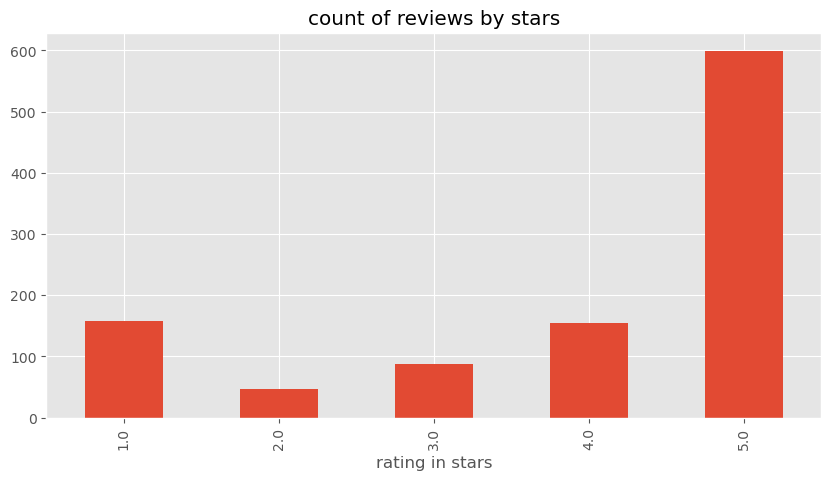

In [82]:
ax = df['rating'].value_counts().sort_index().plot(kind= 'bar' , 
                                        title= 'count of reviews by stars' , 
                                        figsize= (10,5))
ax.set_xlabel('rating in stars')
plt.show()

In [83]:
example = df['review'] [52]
print(example)

Not useable. Sent it overseas, unfortunately the phone is locked. Waste of money.


In [84]:
tokens = nltk.word_tokenize(example)
tokens[:10]


['Not',
 'useable',
 '.',
 'Sent',
 'it',
 'overseas',
 ',',
 'unfortunately',
 'the',
 'phone']

In [85]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Not', 'RB'),
 ('useable', 'JJ'),
 ('.', '.'),
 ('Sent', 'VBD'),
 ('it', 'PRP'),
 ('overseas', 'RB'),
 (',', ','),
 ('unfortunately', 'RB'),
 ('the', 'DT'),
 ('phone', 'NN')]

In [86]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() 

(S
  Not/RB
  useable/JJ
  ./.
  Sent/VBD
  it/PRP
  overseas/RB
  ,/,
  unfortunately/RB
  the/DT
  phone/NN
  is/VBZ
  locked/VBN
  ./.
  Waste/NN
  of/IN
  money/NN
  ./.)


In [87]:

sia = SentimentIntensityAnalyzer()

In [88]:
sia.polarity_scores('This phone is useless')

{'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.4215}

In [89]:
example

'Not useable. Sent it overseas, unfortunately the phone is locked. Waste of money.'

In [90]:
sia.polarity_scores(example)

{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.6369}

In [91]:
#Run the polarity score on the whole dataset
df

product_title  \
0     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
1     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
2     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
3     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
4     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
5     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
6     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
7     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
8     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
9     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
10    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
11    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
12    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
13    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
14    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
15    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
16    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
17    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
18    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
19    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
20    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
21    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
22    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
23    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
24    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
25    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
26    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
27    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
28    Google Pixel 7a - Unlocked Android Cell Phone ...   
29    Google Pixel 7a - Unlocked Android Cell Phone ...   
30    Google Pixel 7a - Unlocked Android Cell Phone ...   
31    Google Pixel 7a - Unlocked Android Cell Phone ...   
32    Google Pixel 7a - Unlocked Android Cell Phone ...   
33    Google Pixel 7a - Unlocked Android Cell Phone ...   
34    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
35    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
36    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
37    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
38    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
39    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
40    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
41    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
42    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
43    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
44    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
45    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
46    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
47    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
48    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
49    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
50    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
51    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
52    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
53    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
54    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
55    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
56    Samsung Galaxy S23 Unlocked Android Smartphone...   
57    Samsung Galaxy S23 Unlocked Android Smartphone...   
58    Samsung Galaxy S23 Unlocked Android Smartphone...   
59    Samsung Galaxy S23 Unlocked Android Smartphone...   
60    Samsung Galaxy S23 Unlocked Android Smartphone...   
61    Samsung Galaxy S23 Unlocked Android Smartphone...   
62    Samsung Galaxy S23 Unlocked Android Smartphone...   
63    Samsung Galaxy S23 Unlocked Android Smartphone...   
64    Google Pixel 8 - Unlocked Android Smartphone w...   
65    Google Pixel 8 - Unlocked Android Smartphone w...   
66    Google Pixel 8 - Unlocked Android Smartphone w...   
67    Google Pixel 8 - Unlocke

In [92]:
df['ID'] = range(1, len(df) + 1)

In [93]:
df

product_title  \
0     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
1     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
2     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
3     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
4     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
5     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
6     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
7     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
8     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
9     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
10    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
11    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
12    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
13    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
14    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
15    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
16    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
17    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
18    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
19    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
20    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
21    OnePlus Nord N30 5G | Unlocked Dual-SIM Androi...   
22    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
23    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
24    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
25    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
26    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
27    SAMSUNG Galaxy S23 FE Cell Phone, 256GB, Unloc...   
28    Google Pixel 7a - Unlocked Android Cell Phone ...   
29    Google Pixel 7a - Unlocked Android Cell Phone ...   
30    Google Pixel 7a - Unlocked Android Cell Phone ...   
31    Google Pixel 7a - Unlocked Android Cell Phone ...   
32    Google Pixel 7a - Unlocked Android Cell Phone ...   
33    Google Pixel 7a - Unlocked Android Cell Phone ...   
34    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
35    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
36    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
37    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
38    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
39    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
40    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
41    SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...   
42    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
43    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
44    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
45    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
46    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
47    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
48    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
49    OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   
50    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
51    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
52    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
53    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
54    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
55    Nokia G10 | Android 11 | Unlocked GSM Smartpho...   
56    Samsung Galaxy S23 Unlocked Android Smartphone...   
57    Samsung Galaxy S23 Unlocked Android Smartphone...   
58    Samsung Galaxy S23 Unlocked Android Smartphone...   
59    Samsung Galaxy S23 Unlocked Android Smartphone...   
60    Samsung Galaxy S23 Unlocked Android Smartphone...   
61    Samsung Galaxy S23 Unlocked Android Smartphone...   
62    Samsung Galaxy S23 Unlocked Android Smartphone...   
63    Samsung Galaxy S23 Unlocked Android Smartphone...   
64    Google Pixel 8 - Unlocked Android Smartphone w...   
65    Google Pixel 8 - Unlocked Android Smartphone w...   
66    Google Pixel 8 - Unlocked Android Smartphone w...   
67    Google Pixel 8 - Unlocke

In [94]:
res = {}
for i, row in tqdm(df.iterrows() , total= len(df)):
    review = row['review']
    myid   = row['ID']
    res[myid] = sia.polarity_scores(review)

100%|██████████| 1045/1045 [00:04<00:00, 209.63it/s]


In [95]:
res

{1: {'neg': 0.031, 'neu': 0.84, 'pos': 0.129, 'compound': 0.9932},
 2: {'neg': 0.026, 'neu': 0.802, 'pos': 0.172, 'compound': 0.9071},
 3: {'neg': 0.021, 'neu': 0.825, 'pos': 0.153, 'compound': 0.9534},
 4: {'neg': 0.012, 'neu': 0.68, 'pos': 0.308, 'compound': 0.9935},
 5: {'neg': 0.091, 'neu': 0.776, 'pos': 0.133, 'compound': 0.4142},
 6: {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9866},
 7: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9714},
 8: {'neg': 0.044, 'neu': 0.877, 'pos': 0.078, 'compound': 0.7501},
 9: {'neg': 0.05, 'neu': 0.754, 'pos': 0.196, 'compound': 0.9986},
 10: {'neg': 0.006, 'neu': 0.798, 'pos': 0.196, 'compound': 0.9961},
 11: {'neg': 0.053, 'neu': 0.726, 'pos': 0.22, 'compound': 0.9299},
 12: {'neg': 0.098, 'neu': 0.699, 'pos': 0.203, 'compound': 0.8694},
 13: {'neg': 0.007, 'neu': 0.801, 'pos': 0.191, 'compound': 0.9879},
 14: {'neg': 0.05, 'neu': 0.754, 'pos': 0.196, 'compound': 0.9986},
 15: {'neg': 0.006, 'neu': 0.798, 'pos': 0.196, 'com

In [96]:
vaders = pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index' : 'ID'})
vaders = vaders.merge(df,how='left')

In [97]:
vaders

ID    neg    neu    pos  compound  \
0        1  0.031  0.840  0.129    0.9932   
1        2  0.026  0.802  0.172    0.9071   
2        3  0.021  0.825  0.153    0.9534   
3        4  0.012  0.680  0.308    0.9935   
4        5  0.091  0.776  0.133    0.4142   
5        6  0.000  0.708  0.292    0.9866   
6        7  0.000  0.824  0.176    0.9714   
7        8  0.044  0.877  0.078    0.7501   
8        9  0.050  0.754  0.196    0.9986   
9       10  0.006  0.798  0.196    0.9961   
10      11  0.053  0.726  0.220    0.9299   
11      12  0.098  0.699  0.203    0.8694   
12      13  0.007  0.801  0.191    0.9879   
13      14  0.050  0.754  0.196    0.9986   
14      15  0.006  0.798  0.196    0.9961   
15      16  0.053  0.726  0.220    0.9299   
16      17  0.098  0.699  0.203    0.8694   
17      18  0.007  0.801  0.191    0.9879   
18      19  0.066  0.726  0.208    0.9969   
19      20  0.040  0.834  0.125    0.7613   
20      21  0.105  0.741  0.154    0.9911   
21      22  0.000  0.825  0.175    0.9678   
22      23  0.051  0.890  0.059    0.0702   
23      24  0.031  0.909  0.060    0.7405   
24      25  0.030  0.884  0.087    0.9091   
25      26  0.000  0.725  0.275    0.9100   
26      27  0.109  0.642  0.249    0.9041   
27      28  0.030  0.872  0.098    0.6649   
28      29  0.016  0.848  0.135    0.9986   
29      30  0.025  0.862  0.113    0.9322   
30      31  0.000  0.923  0.077    0.9100   
31      32  0.085  0.811  0.105    0.3291   
32      33  0.000  0.551  0.449    0.8687   
33      34  0.000  0.818  0.182    0.9364   
34      35  0.050  0.877  0.073    0.9467   
35      36  0.043  0.842  0.115    0.4824   
36      37  0.000  0.632  0.368    0.7906   
37      38  0.000  1.000  0.000    0.0000   
38      39  0.124  0.876  0.000   -0.5499   
39      40  0.000  1.000  0.000    0.0000   
40      41  0.000  1.000  0.000    0.0000   
41      42  0.090  0.836  0.074   -0.1280   
42      43  0.039  0.762  0.199    0.9954   
43      44  0.033  0.775  0.192    0.9929   
44      45  0.065  0.780  0.155    0.8111   
45      46  0.091  0.877  0.032   -0.9232   
46      47  0.000  1.000  0.000    0.0000   
47      48  0.000  0.455  0.545    0.8957   
48      49  0.000  0.694  0.306    0.9441   
49      50  0.117  0.821  0.061   -0.6984   
50      51  0.021  0.822  0.157    0.8114   
51      52  0.000  0.762  0.238    0.6124   
52      53  0.321  0.679  0.000   -0.6369   
53      54  0.176  0.724  0.100   -0.2960   
54      55  0.179  0.821  0.000   -0.3412   
55      56  0.045  0.885  0.070    0.3164   
56      57  0.000  0.580  0.420    0.9062   
57      58  0.208  0.378  0.415    0.4926   
58      59  0.000  0.817  0.183    0.8774   
59      60  0.065  0.794  0.141    0.9649   
60      61  0.049  0.685  0.266    0.7665   
61      62  0.040  0.712  0.248    0.9593   
62      63  0.033  0.837  0.130    0.9380   
63      64  0.000  0.921  0.079    0.5927   
64      65  0.046  0.740  0.214    0.9751   
65      66  0.050  0.814  0.135    0.9868   
66      67  0.054  0.875  0.071    0.6975   
67      68  0.097  0.748  0.155    0.9432   
68      69  0.000  0.544  0.456    0.9934   
69      70  0.064  0.888  0.048   -0.2023   
70      71  0.000  0.562  0.438    0.8313   
71      72  0.000  0.559  0.441    0.9757   
72      73  0.000  0.860  0.140    0.5994   
73      74  0.045  0.863  0.092    0.7881   
74      75  0.084  0.785  0.130    0.6395   
75      76  0.182  0.781  0.037   -0.8758   
76      77  0.040  0.768  0.192    0.8292   
77      78  0.058  0.765  0.177    0.9607   
78      79  0.090  0.794  0.116    0.7042   
79      80  0.085  0.767  0.147    0.8759   
80      81  0.123  0.754  0.124    0.3049   
81      82  0.065  0.784  0.151    0.9974   
82      83  0.040  0.766  0.194    0.9875   
83      84  0.123  0.758  0.119   -0.1064   
84      85  0.000  0.691  0.309    0.9244   
85      86  0.000  0.682  0.318    0.9254   
86      87  0.088  0.912  0.000   -0.4215   
87      88  0.000  0.952  0.048    0.7469   
88 

In [98]:
vaders

ID    neg    neu    pos  compound  \
0        1  0.031  0.840  0.129    0.9932   
1        2  0.026  0.802  0.172    0.9071   
2        3  0.021  0.825  0.153    0.9534   
3        4  0.012  0.680  0.308    0.9935   
4        5  0.091  0.776  0.133    0.4142   
5        6  0.000  0.708  0.292    0.9866   
6        7  0.000  0.824  0.176    0.9714   
7        8  0.044  0.877  0.078    0.7501   
8        9  0.050  0.754  0.196    0.9986   
9       10  0.006  0.798  0.196    0.9961   
10      11  0.053  0.726  0.220    0.9299   
11      12  0.098  0.699  0.203    0.8694   
12      13  0.007  0.801  0.191    0.9879   
13      14  0.050  0.754  0.196    0.9986   
14      15  0.006  0.798  0.196    0.9961   
15      16  0.053  0.726  0.220    0.9299   
16      17  0.098  0.699  0.203    0.8694   
17      18  0.007  0.801  0.191    0.9879   
18      19  0.066  0.726  0.208    0.9969   
19      20  0.040  0.834  0.125    0.7613   
20      21  0.105  0.741  0.154    0.9911   
21      22  0.000  0.825  0.175    0.9678   
22      23  0.051  0.890  0.059    0.0702   
23      24  0.031  0.909  0.060    0.7405   
24      25  0.030  0.884  0.087    0.9091   
25      26  0.000  0.725  0.275    0.9100   
26      27  0.109  0.642  0.249    0.9041   
27      28  0.030  0.872  0.098    0.6649   
28      29  0.016  0.848  0.135    0.9986   
29      30  0.025  0.862  0.113    0.9322   
30      31  0.000  0.923  0.077    0.9100   
31      32  0.085  0.811  0.105    0.3291   
32      33  0.000  0.551  0.449    0.8687   
33      34  0.000  0.818  0.182    0.9364   
34      35  0.050  0.877  0.073    0.9467   
35      36  0.043  0.842  0.115    0.4824   
36      37  0.000  0.632  0.368    0.7906   
37      38  0.000  1.000  0.000    0.0000   
38      39  0.124  0.876  0.000   -0.5499   
39      40  0.000  1.000  0.000    0.0000   
40      41  0.000  1.000  0.000    0.0000   
41      42  0.090  0.836  0.074   -0.1280   
42      43  0.039  0.762  0.199    0.9954   
43      44  0.033  0.775  0.192    0.9929   
44      45  0.065  0.780  0.155    0.8111   
45      46  0.091  0.877  0.032   -0.9232   
46      47  0.000  1.000  0.000    0.0000   
47      48  0.000  0.455  0.545    0.8957   
48      49  0.000  0.694  0.306    0.9441   
49      50  0.117  0.821  0.061   -0.6984   
50      51  0.021  0.822  0.157    0.8114   
51      52  0.000  0.762  0.238    0.6124   
52      53  0.321  0.679  0.000   -0.6369   
53      54  0.176  0.724  0.100   -0.2960   
54      55  0.179  0.821  0.000   -0.3412   
55      56  0.045  0.885  0.070    0.3164   
56      57  0.000  0.580  0.420    0.9062   
57      58  0.208  0.378  0.415    0.4926   
58      59  0.000  0.817  0.183    0.8774   
59      60  0.065  0.794  0.141    0.9649   
60      61  0.049  0.685  0.266    0.7665   
61      62  0.040  0.712  0.248    0.9593   
62      63  0.033  0.837  0.130    0.9380   
63      64  0.000  0.921  0.079    0.5927   
64      65  0.046  0.740  0.214    0.9751   
65      66  0.050  0.814  0.135    0.9868   
66      67  0.054  0.875  0.071    0.6975   
67      68  0.097  0.748  0.155    0.9432   
68      69  0.000  0.544  0.456    0.9934   
69      70  0.064  0.888  0.048   -0.2023   
70      71  0.000  0.562  0.438    0.8313   
71      72  0.000  0.559  0.441    0.9757   
72      73  0.000  0.860  0.140    0.5994   
73      74  0.045  0.863  0.092    0.7881   
74      75  0.084  0.785  0.130    0.6395   
75      76  0.182  0.781  0.037   -0.8758   
76      77  0.040  0.768  0.192    0.8292   
77      78  0.058  0.765  0.177    0.9607   
78      79  0.090  0.794  0.116    0.7042   
79      80  0.085  0.767  0.147    0.8759   
80      81  0.123  0.754  0.124    0.3049   
81      82  0.065  0.784  0.151    0.9974   
82      83  0.040  0.766  0.194    0.9875   
83      84  0.123  0.758  0.119   -0.1064   
84      85  0.000  0.691  0.309    0.9244   
85      86  0.000  0.682  0.318    0.9254   
86      87  0.088  0.912  0.000   -0.4215   
87      88  0.000  0.952  0.048    0.7469   
88 

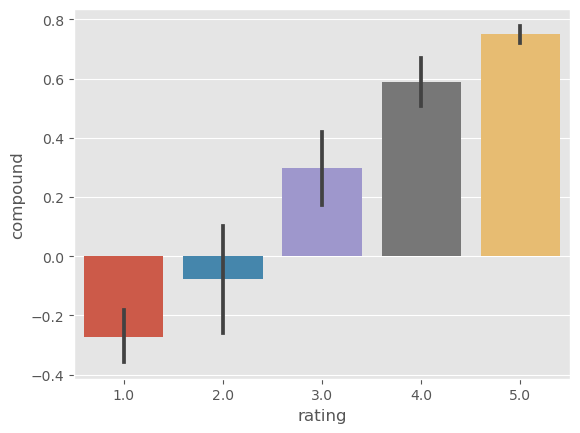

In [99]:
sns.barplot(data=vaders , x='rating' , y = 'compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

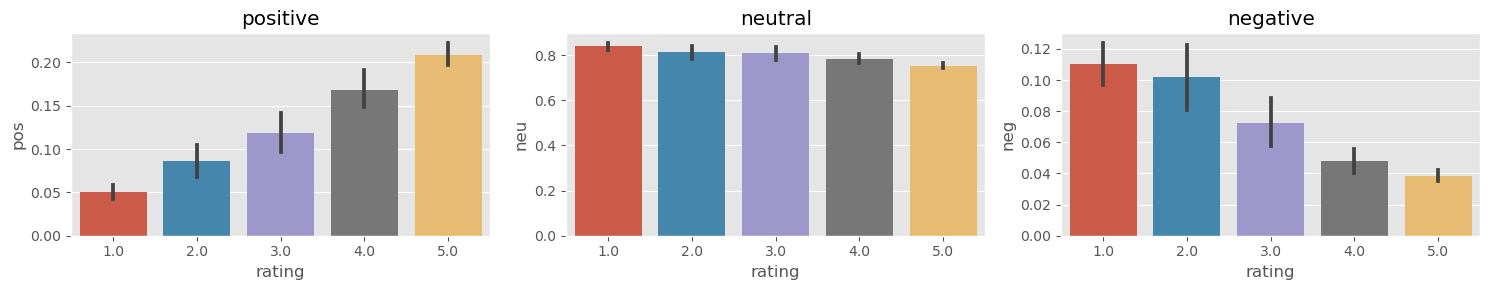

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs=plt.subplots(1, 3 , figsize=(15 , 3))
sns.barplot(data=vaders , x='rating' , y= 'pos' , ax=axs[0])
sns.barplot(data=vaders , x='rating' , y= 'neu' , ax=axs[1])
sns.barplot(data=vaders , x='rating' , y= 'neg' , ax=axs[2])
axs[0].set_title('positive'),
axs[1].set_title('neutral'),
axs[2].set_title('negative'),
plt.tight_layout()
plt.show()

In [101]:
#ROBERTA Pretrained  Model
#Use a model trained ofa large corpus of data
#Transformer model accounts for the words but also the context related to other words

In [102]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [103]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [104]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [105]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [106]:
import sys
print(sys.path)

['c:\\Users\\User\\anaconda3\\python39.zip', 'c:\\Users\\User\\anaconda3\\DLLs', 'c:\\Users\\User\\anaconda3\\lib', 'c:\\Users\\User\\anaconda3', '', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin', 'c:\\Users\\User\\anaconda3\\lib\\site-packages', 'c:\\Users\\User\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\User\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\anaconda3\\lib\\site-packages\\Pythonwin']


In [107]:
from transformers import AutoTokenizer

In [108]:
from transformers import AutoModelForSequenceClassification

In [109]:
import torch
print(f"PyTorch version: {torch.__version__}")

from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

print("Model and tokenizer loaded successfully.")



PyTorch version: 2.2.2


c:\Users\User\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model and tokenizer loaded successfully.


In [110]:
#Vader result on example
print(example)
sia.polarity_scores(example)

Not useable. Sent it overseas, unfortunately the phone is locked. Waste of money.


{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.6369}

In [111]:
def polarity_scores_roberta(example): 
    encoded_text = tokenizer(example, return_tensors="pt" ,padding="max_length", max_length=514, truncation=True)
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg' : rating[0],
        'roberta_neu' : rating[1],
        'roberta_pos' : rating[2]
    }
    return rating_dict

In [112]:

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt", padding="max_length", max_length=512, truncation=True)
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [113]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [115]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    review = row['review']
    myid   = row['ID']
    vader_result = sia.polarity_scores(review)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(review)
    both = {**vader_result_rename , **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for Id {myid}')

    
    

100%|██████████| 1045/1045 [31:35<00:00,  1.81s/it]


In [116]:
result_df = pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns={'index' : 'ID'})
result_df = result_df.merge(df,how='left')

In [117]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
result_df

ID  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0        1      0.031      0.840      0.129          0.9932     0.030945   
1        2      0.026      0.802      0.172          0.9071     0.004602   
2        3      0.021      0.825      0.153          0.9534     0.012296   
3        4      0.012      0.680      0.308          0.9935     0.007969   
4        5      0.091      0.776      0.133          0.4142     0.019677   
5        6      0.000      0.708      0.292          0.9866     0.006607   
6        7      0.000      0.824      0.176          0.9714     0.004295   
7        8      0.044      0.877      0.078          0.7501     0.483622   
8        9      0.050      0.754      0.196          0.9986     0.007852   
9       10      0.006      0.798      0.196          0.9961     0.002061   
10      11      0.053      0.726      0.220          0.9299     0.163037   
11      12      0.098      0.699      0.203          0.8694     0.054779   
12      13      0.007      0.801      0.191          0.9879     0.014957   
13      14      0.050      0.754      0.196          0.9986     0.007852   
14      15      0.006      0.798      0.196          0.9961     0.002061   
15      16      0.053      0.726      0.220          0.9299     0.163037   
16      17      0.098      0.699      0.203          0.8694     0.054779   
17      18      0.007      0.801      0.191          0.9879     0.014957   
18      19      0.066      0.726      0.208          0.9969     0.049055   
19      20      0.040      0.834      0.125          0.7613     0.011056   
20      21      0.105      0.741      0.154          0.9911     0.305402   
21      22      0.000      0.825      0.175          0.9678     0.004390   
22      23      0.051      0.890      0.059          0.0702     0.143522   
23      24      0.031      0.909      0.060          0.7405     0.375003   
24      25      0.030      0.884      0.087          0.9091     0.350429   
25      26      0.000      0.725      0.275          0.9100     0.042377   
26      27      0.109      0.642      0.249          0.9041     0.001845   
27      28      0.030      0.872      0.098          0.6649     0.643212   
28      29      0.016      0.848      0.135          0.9986     0.005054   
29      30      0.025      0.862      0.113          0.9322     0.095446   
30      31      0.000      0.923      0.077          0.9100     0.022494   
31      32      0.085      0.811      0.105          0.3291     0.800756   
32      33      0.000      0.551      0.449          0.8687     0.000926   
33      34      0.000      0.818      0.182          0.9364     0.002125   
34      35      0.050      0.877      0.073          0.9467     0.110467   
35      36      0.043      0.842      0.115          0.4824     0.910827   
36      37      0.000      0.632      0.368          0.7906     0.001612   
37      38      0.000      1.000      0.000          0.0000     0.028827   
38      39      0.124      0.876      0.000         -0.5499     0.862175   
39      40      0.000      1.000      0.000          0.0000     0.089540   
40      41      0.000      1.000      0.000          0.0000     0.219646   
41      42      0.090      0.836      0.074         -0.1280     0.895778   
42      43      0.039      0.762      0.199          0.9954     0.031993   
43      44      0.033      0.775      0.192          0.9929     0.003677   
44      45      0.065      0.780      0.155          0.8111     0.015898   
45      46      0.091      0.877      0.032         -0.9232     0.041408   
46      47      0.000      1.000      0.000          0.0000     0.872920   
47      48      0.000      0.455      0.545          0.8957     0.001512   
48      49      0.000      0.694      0.306          0.9441     0.001747   
49      50      0.117      0.821      0.061         -0.6984     0.610673   
50      51      0.021      0.822      0.157          0.8114     0.013006   
51      52      0.000      0.762      0.238          0.6

In [118]:
## Compare Scores between Models

In [119]:
result_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_title',
       'user_name', 'rating', 'review'],
      dtype='object')

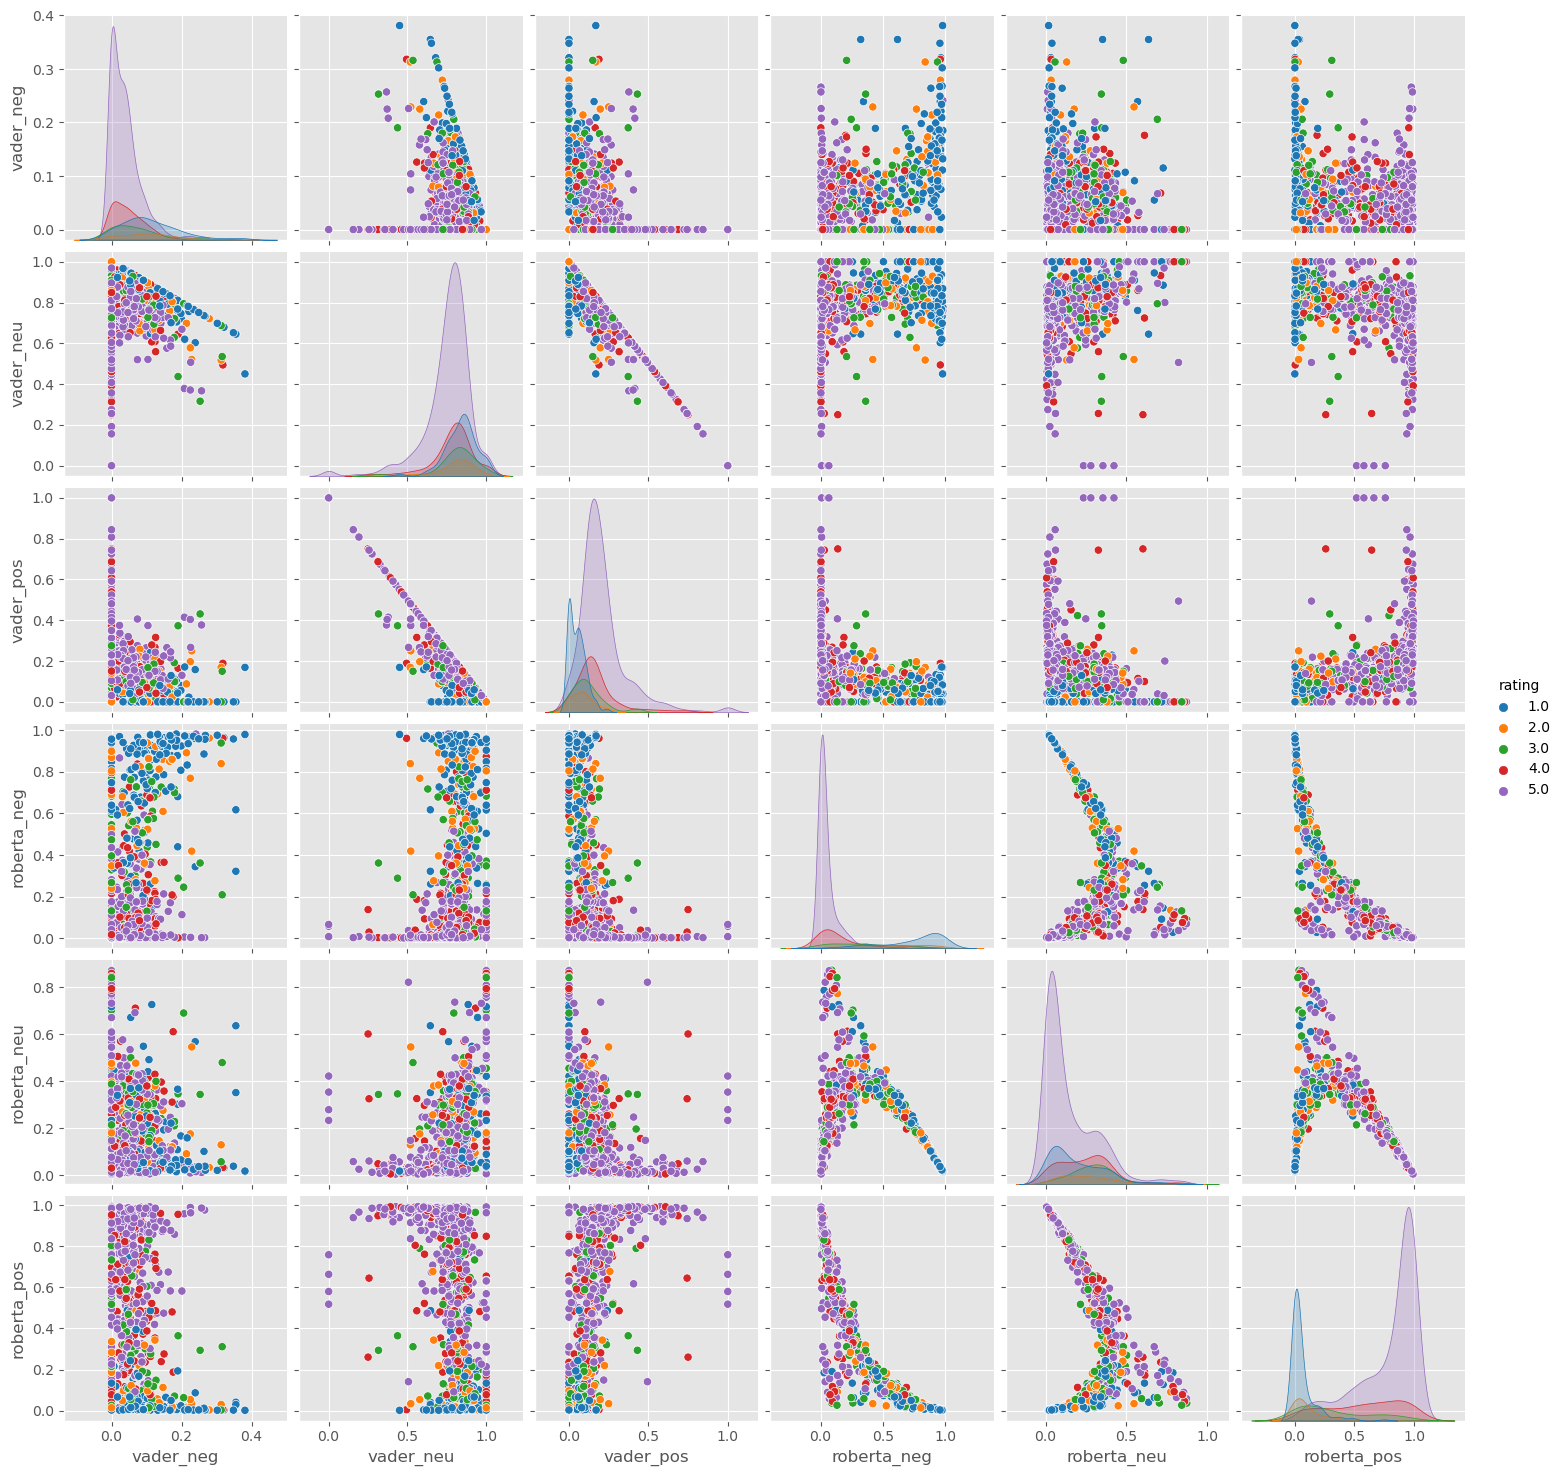

In [120]:
sns.pairplot(data=result_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='rating',
             palette="tab10")

plt.show()

In [121]:
df = pd.read_csv('./amazon_dataset (1).csv')  # Load your dataset

# Adjust display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df)

                                          product_title  \
0     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
1     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
2     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
3     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
4     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
5     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
6     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
7     SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...   
8     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
9     SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
10    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
11    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
12    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
13    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
14    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp...   
15    SAMSUNG Galaxy S24 Cell Phone, 256GB AI Smartp... 

In [122]:
roberta_result

{'roberta_neg': 0.5924573,
 'roberta_neu': 0.34042853,
 'roberta_pos': 0.06711421}

In [123]:
{**vader_result_rename , **roberta_result}

{'vader_neg': 0.017,
 'vader_neu': 0.923,
 'vader_pos': 0.059,
 'vader_compound': 0.6908,
 'roberta_neg': 0.5924573,
 'roberta_neu': 0.34042853,
 'roberta_pos': 0.06711421}